# Yemen, context: HGDP

Overlap:329K variants
Just including 169 Yemeni samples

Requires a recent version of bokeh, to use legend labels.
Use conda environment impute on btc server to run jupyter in.

Using smartPCA, should simplify (no table joining needed)


In [ ]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
%matplotlib notebook
from bokeh.io import output_notebook
output_notebook()

### Loading PCA results

PCA was done for the merged dataset HGDP+ Yemen169.
Performed with FlashPCA, which gives up to 10 PCs.
Annoyingly, the Ids were of different format to the ones in the meta data, so had to fix that:

urn:wtsi:402769_H09_3577STDY6068568 -> 3577STDY6068568


In [113]:
def format(line):
    fields = line.split()
    iid = fields[0]
    if iid.startswith: iid = iid[-15:]
    return [iid] + list(map(float, fields[1:-1])) + fields[-1:]
        
base = "hgdp_mind0.3_geno_0.2"
wdir = f"AdmixTools_{base}"
pcafile = f'{wdir}/yemen_{base}.LD.QC.pcs.txt'
df = pd.DataFrame([format(line) for line in open(pcafile)])
df.columns = ['FID1'] + [f'PC{i}' for i in range(1,11)] + ['Region']
ddf = df.set_index('FID1')
ddf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region
FID1,,,,,,,,,,,
#eigvals:,48.6190,36.4270,16.4030,9.5690,6.5440,5.7460,4.5300,4.2200,2.7290,2.674,None
HGDP00448,0.0932,0.0463,-0.0056,0.0028,0.1473,-0.0456,-0.0014,-0.0056,0.0329,0.0036,Biaka_Pygmies
HGDP00479,0.0917,0.0456,-0.0045,0.0003,0.1239,-0.0348,-0.0011,-0.0030,0.0066,0.0051,Biaka_Pygmies
HGDP00985,0.0920,0.0456,-0.0053,-0.0001,0.1299,-0.0418,-0.0005,-0.0017,0.0101,0.0046,Biaka_Pygmies
HGDP01094,0.0906,0.0446,-0.0058,0.0002,0.1178,-0.0378,-0.0008,0.0002,0.0168,0.0018,Biaka_Pygmies
...,...,...,...,...,...,...,...,...,...,...,...
3577STDY6068568,0.0187,-0.0183,0.0006,-0.0036,-0.0215,-0.0375,-0.0333,-0.0062,0.0082,0.0029,Rsa
3577STDY6068600,0.0120,-0.0240,0.0015,-0.0047,-0.0206,-0.0413,-0.0343,-0.0092,0.0041,0.0123,Rsa
3577STDY6068625,0.0154,-0.0223,0.0020,-0.0042,-0.0221,-0.0425,-0.0379,-0.0149,0.0060,0.0154,Rsa


In [114]:
import numpy as np
Y1 = ddf[ddf.Region.isin(yregions)][['PC1', 'PC2']]
Y2 = ddf[ddf.Region.isin(yregions)][['PC1', 'PC2']]
Y = Y


<IPython.core.display.Javascript object>


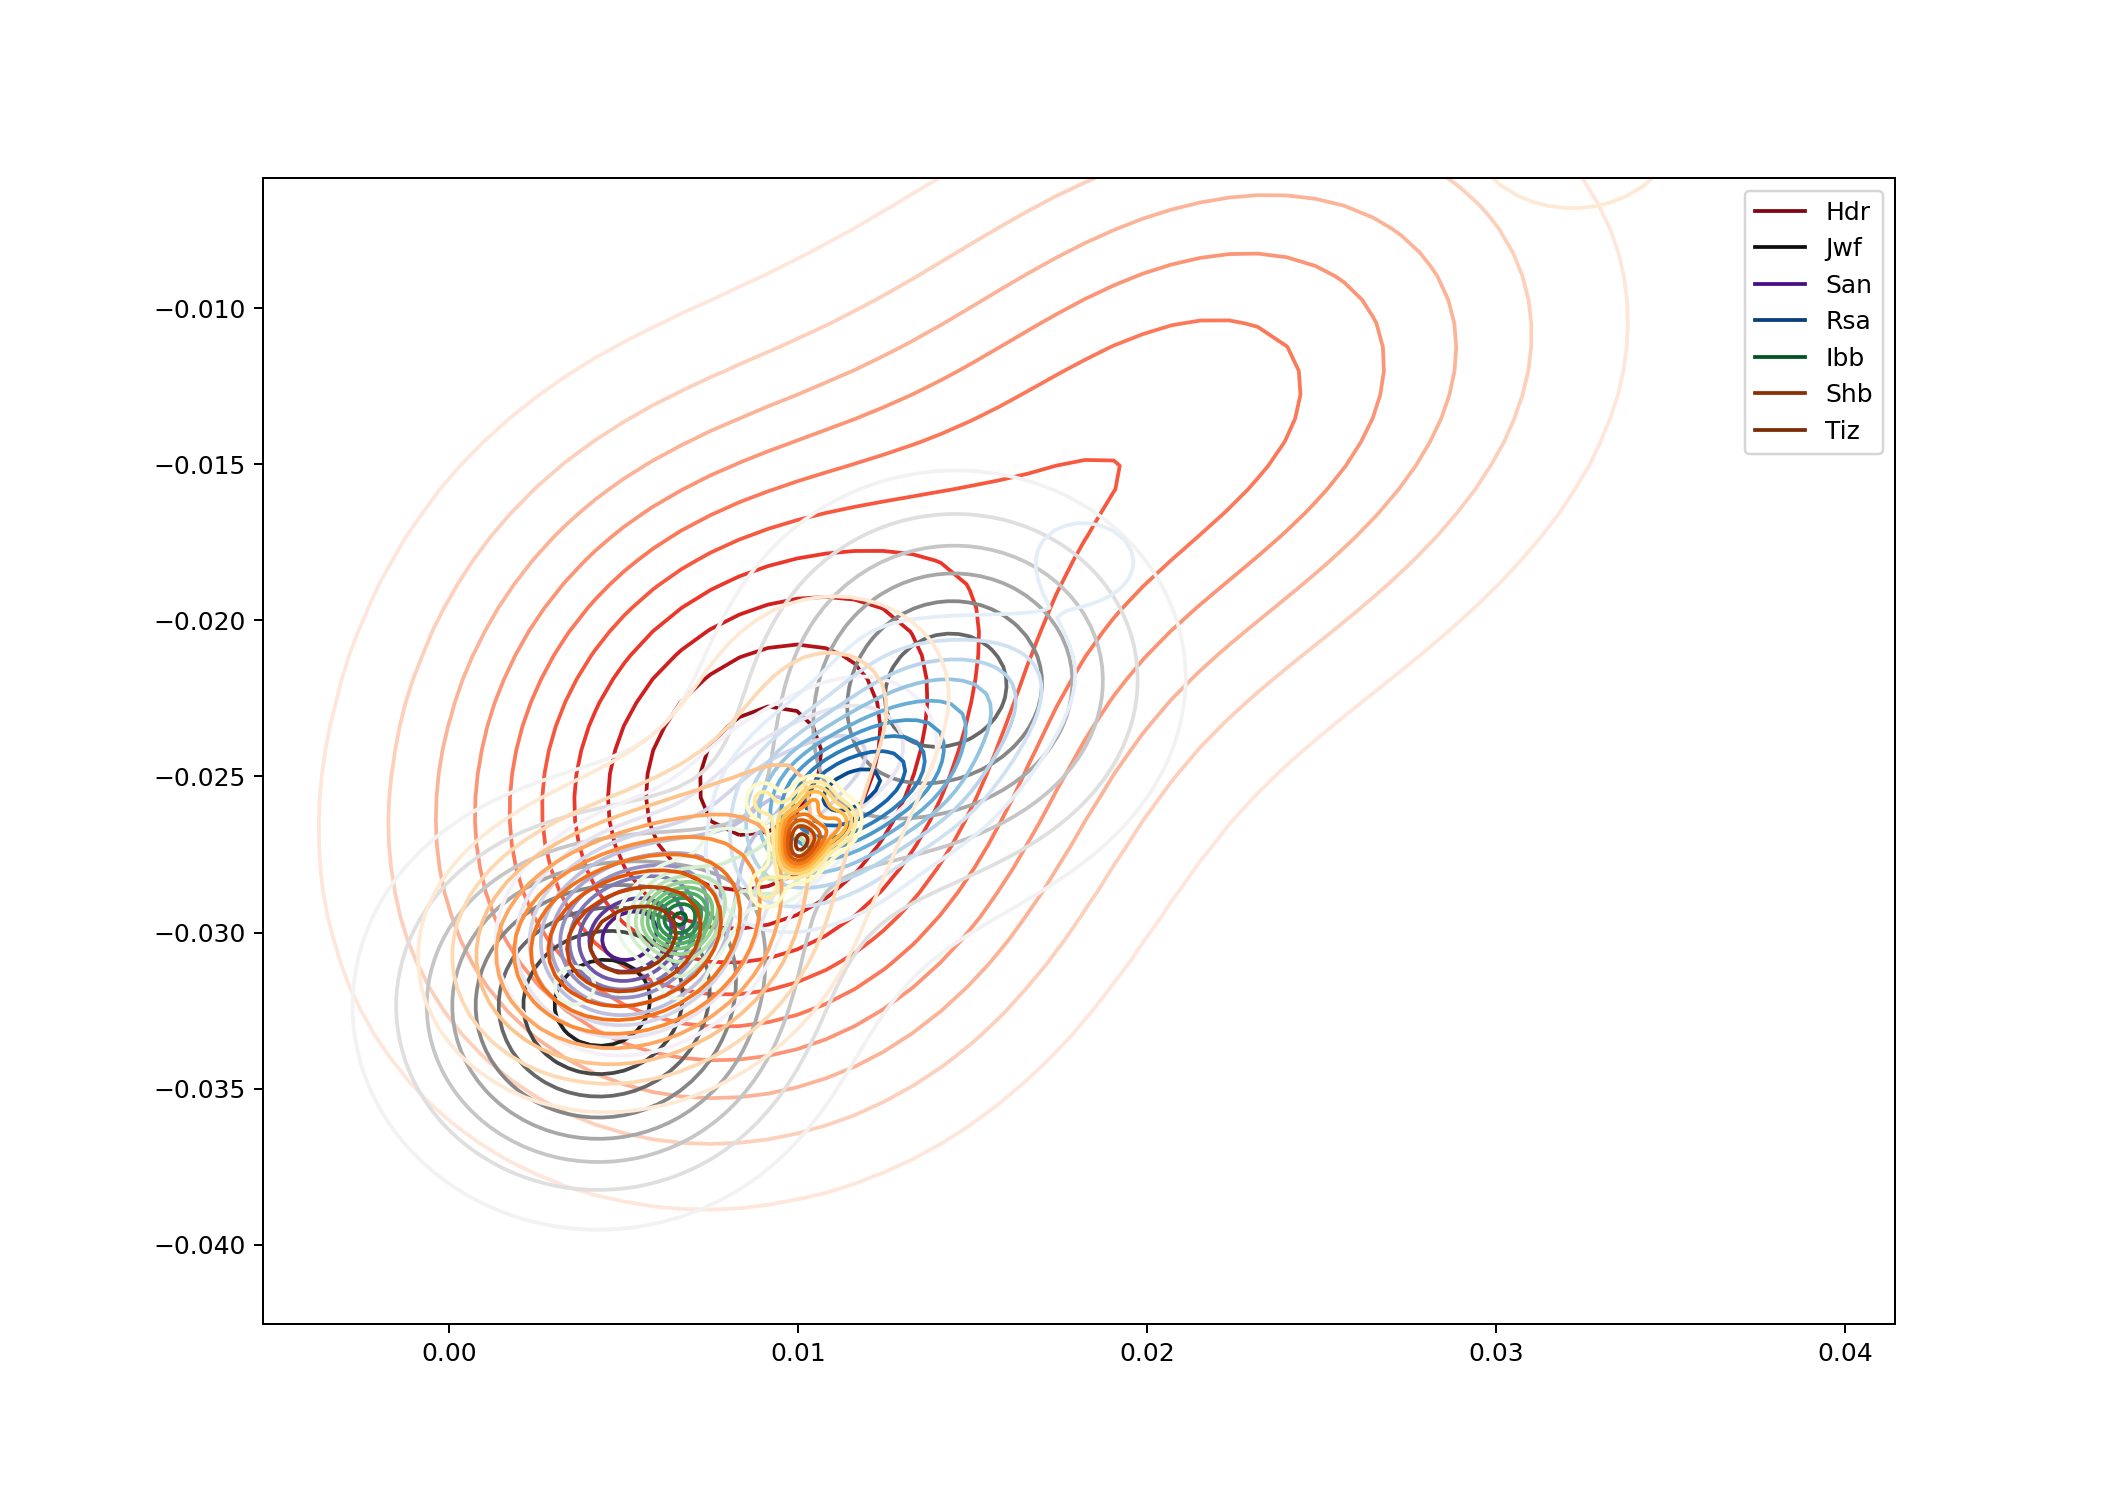

/bmshare/ahenschel/gemini/anaconda/envs/impute/lib/python3.6/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


In [115]:
import seaborn as sns
plt.clf()
gradients = [ 'Reds', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges',]
def igradient():
    for g in gradients:
        yield(g)
        
graditer = igradient()        
for pop in ['French Sardinian North_Italian'.split(), ['Mozabite'],'Palestinian Druze Beduin'.split(), yregions]:
    Y = ddf[ddf.Region.isin(pop)][['PC1', 'PC2']]
    sns.kdeplot(Y, color='red', cmap = next(graditer))


In [121]:
import seaborn as sns
plt.clf()
#gradients = [ 'Reds', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
#gradcols  = [ ]'Red', 'Grey', 'Purple', 'Blue', 'Green', 'Orange',    'Purple', 
def igradient():
    for g in gradients:
        yield(g)
        
graditer = igradient()        
for pop in yregions:
    Y = ddf[ddf.Region==pop][['PC1', 'PC2']]
    if Y.shape[0] > 8:
        cmap = next(graditer)        
        sns.kdeplot(Y, cmap = cmap, label=pop)

plt.legend()

In [ ]:
yemenRegions = ['Sad', 'Amr', 'San', 'Dhm', 'Mhw', 'Haj', 'Hdr', 'Shb', 'Ibb', 'Tiz', 'Jwf', 'Mrb', 'Byd', 'Dal', 'Lahj', 'Abyn', 'Rsa']
import numpy as np
def dist(a,b): ## quick euclidean
    return np.sqrt(np.sum(np.square(a-b)))

def mostCentralSample(region, rdf):
    centroid = np.array(rdf.mean())
    rdf['dist2c'] = [dist(centroid, np.array(row[2:-1])) for i, row in rdf.iterrows()]
    return rdf[rdf.dist2c == rdf.dist2c.min()]
    
dfc = pd.concat([mostCentralSample(region, rdf) for region, rdf in ddf.groupby("Region") if region in yemenRegions])
dfc.to_csv('mostCentralSamples.csv')

In [ ]:
ydf = ddf[ddf.index.str.startswith('3577STDY')]
mostCentralSample('Yemen', ydf)

In [ ]:
yregions = set(['Sad', 'Amr', 'San', 'Dhm', 'Mhw', 'Haj', 'Hdr', 'Shb', 'Ibb', 'Tiz', 'Jwf', 'Mrb', 'Byd', 'Dal', 'Lahj', 'Abyn', 'Rsa'])
regions = yregions.union(list(zip(*Counter(ddf.Region).most_common(40)))[0])

In [ ]:
## only use if you want to collapse all HGDP
if False:
    for i in ddf.index:
        if i.startswith('HGDP'):
            ddf.at[i, 'Region'] = 'HGDP'
    

In [ ]:
from myutils import colors, colors2, markers, markers2

In [ ]:
from bokeh.palettes import Dark2_5 as palette
import itertools

p = figure(width=1400, height=1200)

x = ddf[['PC1', 'PC2']].values
y = ddf['Region'].values

bokehColors = itertools.cycle(palette)
scatter={}
for region in regions:
    if region in yregions: 
        marker = 'circle'
        alpha = 1
    else:
        marker = 'triangle'
        alpha = 0.5
    scatter[region] = p.scatter(x[y==region].T[0], x[y==region].T[1], 
        color=colors.get(region, next(bokehColors)), 
        #marker=markers2.get(region,'triangle'),
        marker = marker,
        size=7,
        alpha=alpha, muted_color='grey', muted_alpha = 0.1, legend_label=region
    )
    if not region in yregions:
        scatter[region].muted = True
p.legend.location = "top_right"
p.legend.click_policy = 'mute'
show(p)

In [ ]:
gr = list(scatter.values())[0]

In [ ]:
gr.muted = False

In [ ]:
np.random.rand(3,)

In [ ]:
regions = ['Sad', 'Amr', 'San', 'Dhm', 'Mhw', 'Haj', 'Hdr', 'Shb', 'Ibb', 'Tiz', 'Jwf', 'Mrb', 'Byd', 'Dal', 'Lahj', 'Abyn', 'Rsa']
fig, ax = plt.subplots(nrows=12, ncols=3, figsize=(16,18))
i,j = 0,0
for pc1 in range(1,10):
    for pc2 in range(pc1+1,10):

        x = ddf[['PC%s'%pc1, 'PC%s'%pc2]].values
        #plt.figure(figsize=(9.5, 8))
        for e in regions:
            n = sum(y == e)
            ax[i][j].set_title('PC %s vs PC %s' %(pc1, pc2))
            ax[i][j].scatter(
                x[y==e].T[0], x[y==e].T[1], label=e,
                c=colors[e],
                #marker=markers[e]
            )
        j+=1
        if j==3: 
            j=0; i+=1
#plt.legend(bbox_to_anchor=(0.9667, -.1), ncol=3)

#ax.tight_layout()

In [ ]:
set(y)

In [ ]:
markers

In [ ]:
ddf.head()

In [ ]:

x = ddf[['PC1', 'PC2', 'PC3']].values
y = ddf[f].values

fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(projection='3d')

for e in order[f]:
    n = sum(y == e)
    ax.scatter(
        x[y==e].T[0], x[y==e].T[1], x[y==e].T[2], label=e,
        color=[colors[f][e]] * n,
        marker=markers[f][e]
    )

ax.view_init(azim=46, elev=-43)
plt.legend(bbox_to_anchor=(0.9667, 0.1667), ncol=3)